[*********************100%***********************]  2 of 2 completed


🔹 Testing period: 2008 Financial Crisis - Recovery
  📈 SPY - Best MAs: (40, 150), Total Return: 117.66%, Sharpe Ratio: 0.65



[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed

  📈 QQQ - Best MAs: (100, 500), Total Return: 130.22%, Sharpe Ratio: 0.97

🔹 Testing period: Dot-Com Bubble Burst
  📈 SPY - Best MAs: (50, 200), Total Return: 38.21%, Sharpe Ratio: 0.62
  📈 QQQ - Best MAs: (50, 200), Total Return: 89.63%, Sharpe Ratio: 0.71

🔹 Testing period: COVID-19 Crash & Recovery
  📈 SPY - Best MAs: (20, 100), Total Return: 59.99%, Sharpe Ratio: 1.98
  📈 QQQ - Best MAs: (20, 100), Total Return: 65.36%, Sharpe Ratio: 1.53

🔹 Testing period: 2001 Recession & Post-9/11 Market Shock



[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


  📈 SPY - Best MAs: (50, 100), Total Return: 46.21%, Sharpe Ratio: 0.66
  📈 QQQ - Best MAs: (70, 200), Total Return: 96.61%, Sharpe Ratio: 0.80

🔹 Testing period: Tech Boom & Dot-Com Crash
  📈 SPY - Best MAs: (40, 300), Total Return: 211.13%, Sharpe Ratio: 0.75


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed

  📈 QQQ - Best MAs: (70, 150), Total Return: 239.27%, Sharpe Ratio: 0.81

🔹 Testing period: Quantitative Easing & Bull Market
  📈 SPY - Best MAs: (100, 450), Total Return: 79.46%, Sharpe Ratio: 0.78
  📈 QQQ - Best MAs: (60, 450), Total Return: 140.94%, Sharpe Ratio: 0.93

🔹 Testing period: Trump Rally & Trade War



[*********************100%***********************]  2 of 2 completed


  📈 SPY - Best MAs: (20, 200), Total Return: 50.25%, Sharpe Ratio: 0.96
  📈 QQQ - Best MAs: (50, 100), Total Return: 88.11%, Sharpe Ratio: 1.08

🔹 Testing period: Post-Cold War & 90s Bull Market
  📈 SPY - Best MAs: (50, 300), Total Return: 256.56%, Sharpe Ratio: 1.30


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed

  📈 QQQ - Best MAs: (10, 100), Total Return: 61.68%, Sharpe Ratio: 2.92

🔹 Testing period: Global Financial Stability (2005-2006)
  📈 SPY - Best MAs: (100, 200), Total Return: 21.74%, Sharpe Ratio: 1.30
  📈 QQQ - Best MAs: (10, 100), Total Return: 19.06%, Sharpe Ratio: 0.75

🔹 Testing period: European Debt Crisis (2010-2012)



[*********************100%***********************]  2 of 2 completed


  📈 SPY - Best MAs: (70, 400), Total Return: 24.69%, Sharpe Ratio: 0.60
  📈 QQQ - Best MAs: (50, 150), Total Return: 21.04%, Sharpe Ratio: 0.46

🔹 Testing period: Pre-GFC Market Run (2003-2007)
  📈 SPY - Best MAs: (50, 150), Total Return: 59.71%, Sharpe Ratio: 0.99
  📈 QQQ - Best MAs: (40, 450), Total Return: 32.08%, Sharpe Ratio: 0.56


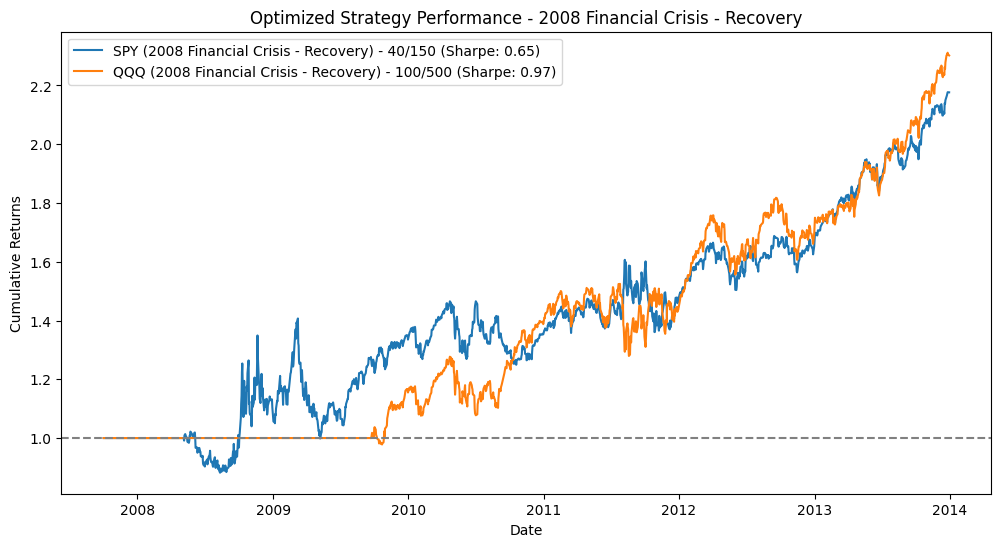

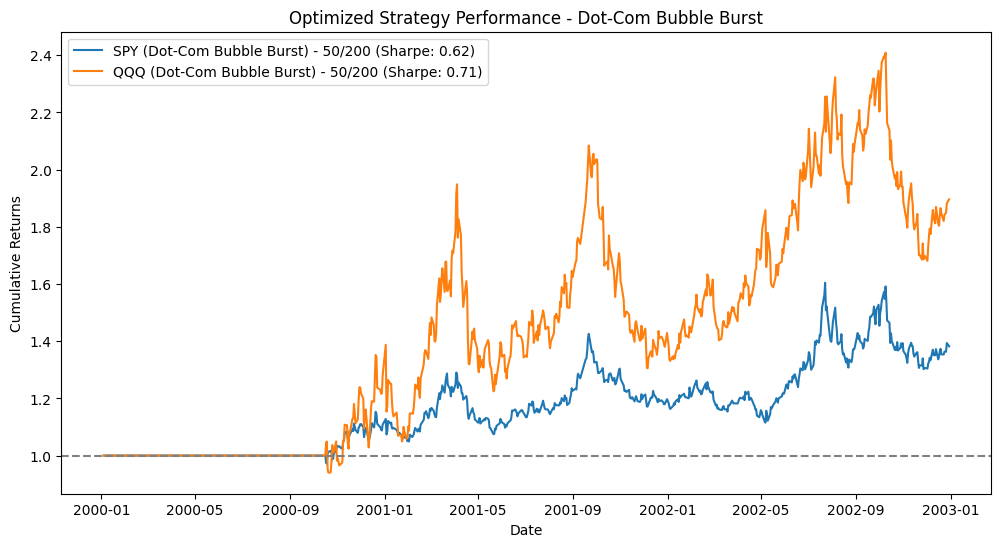

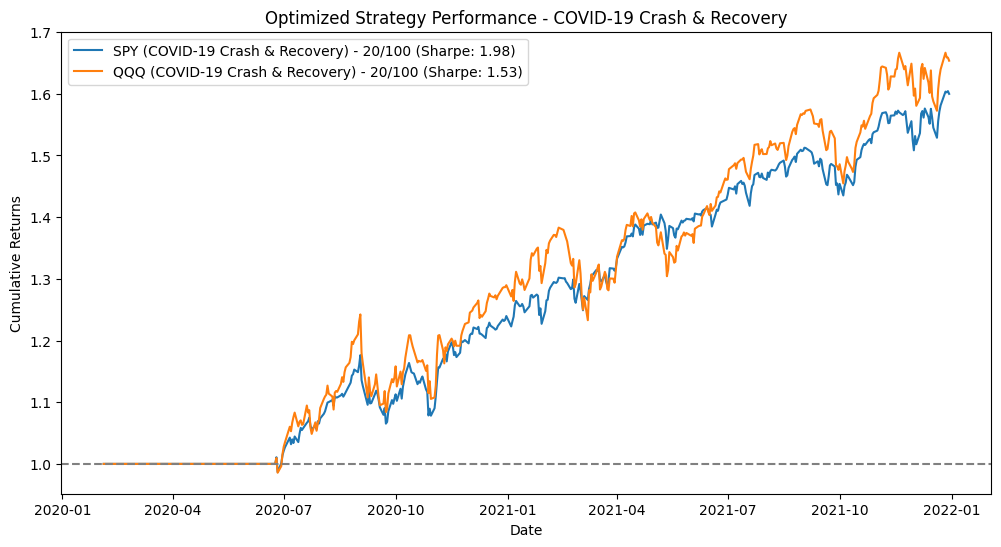

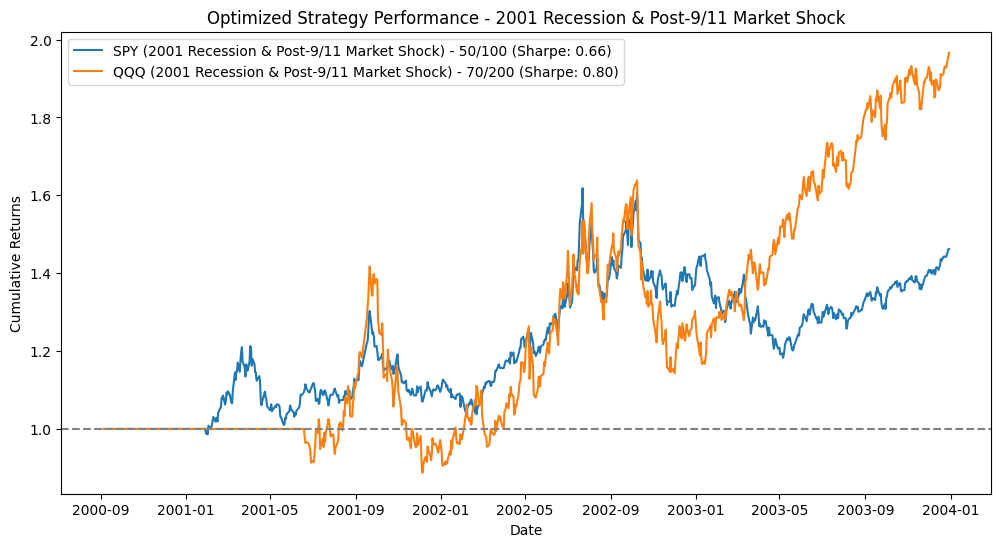

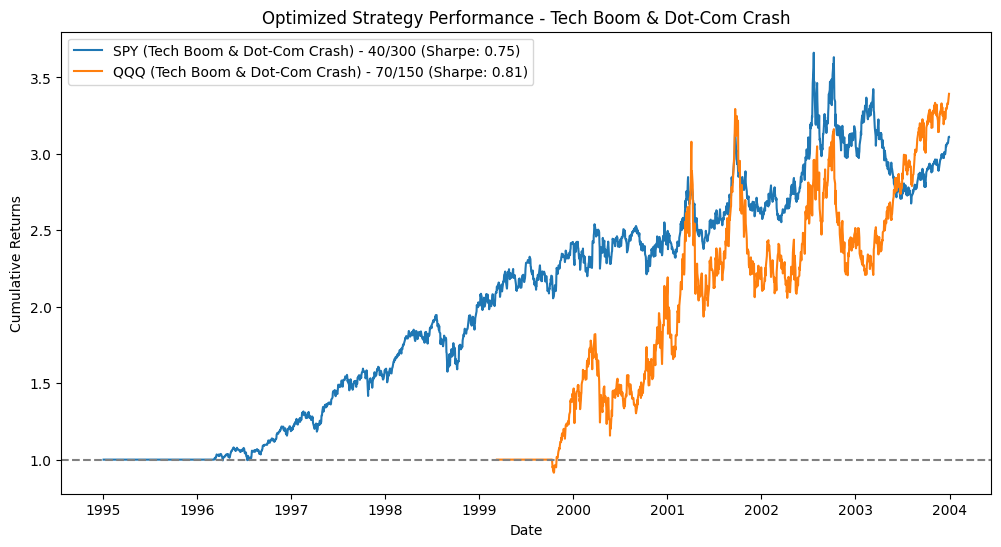

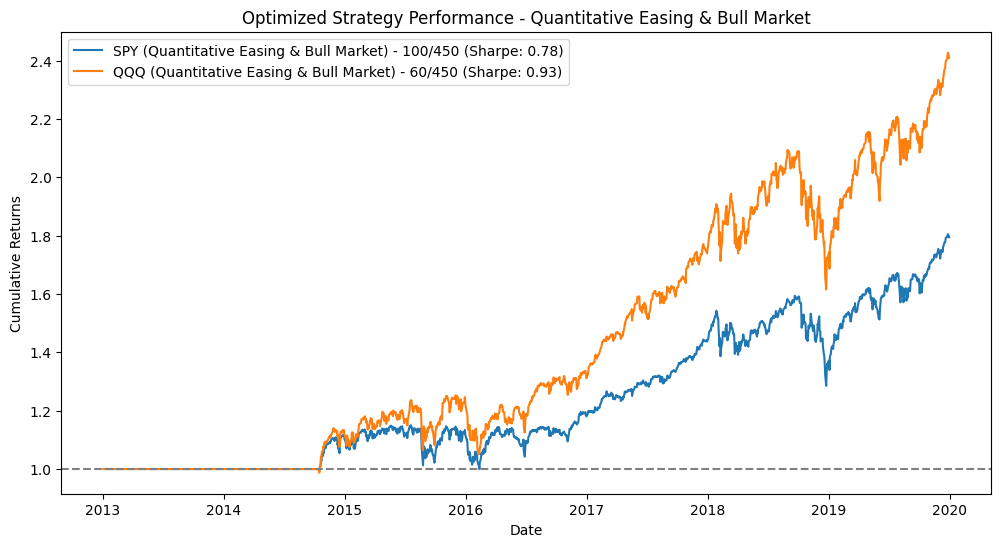

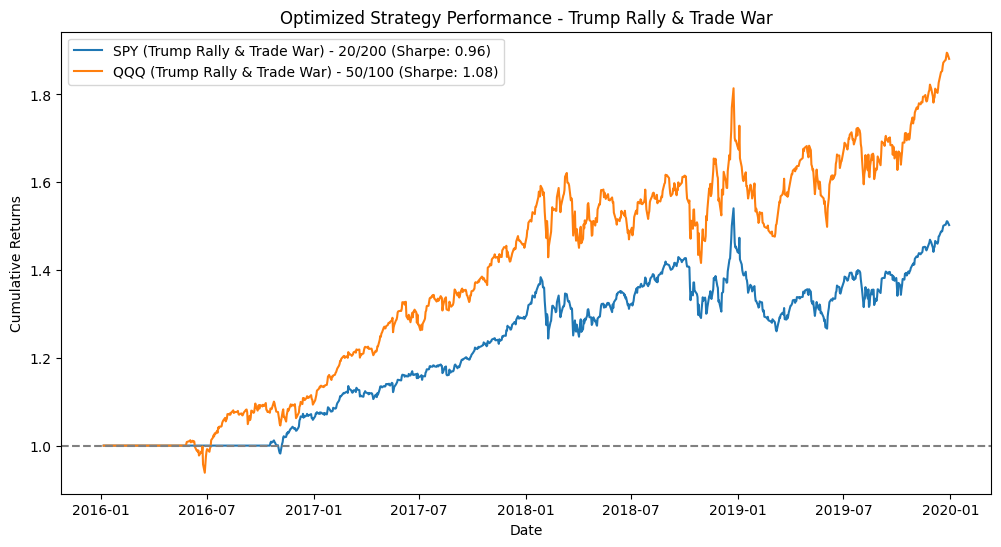

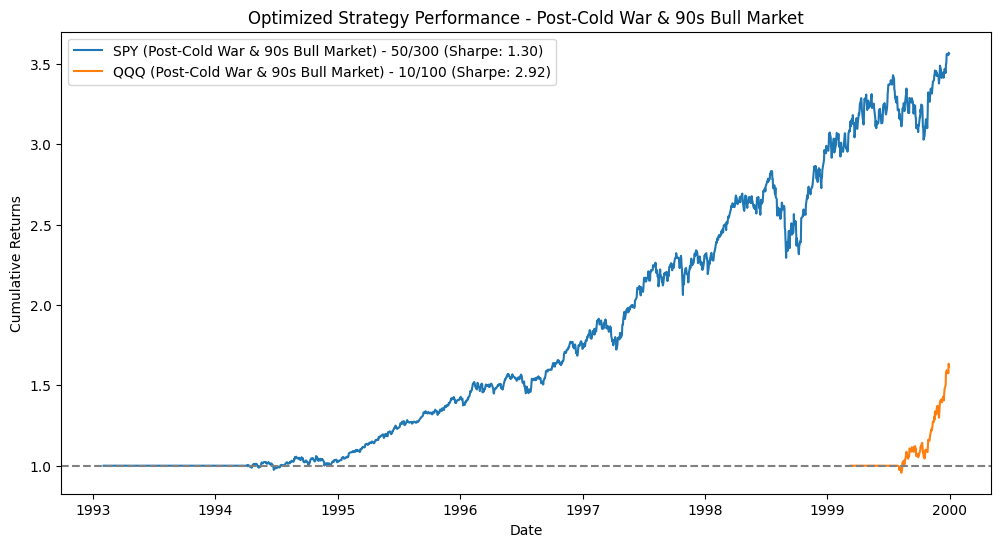

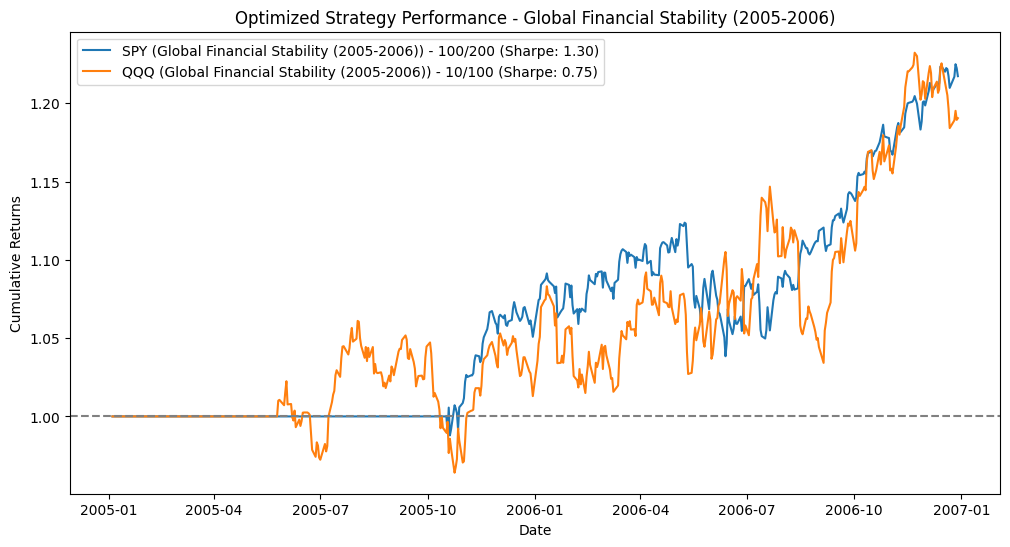

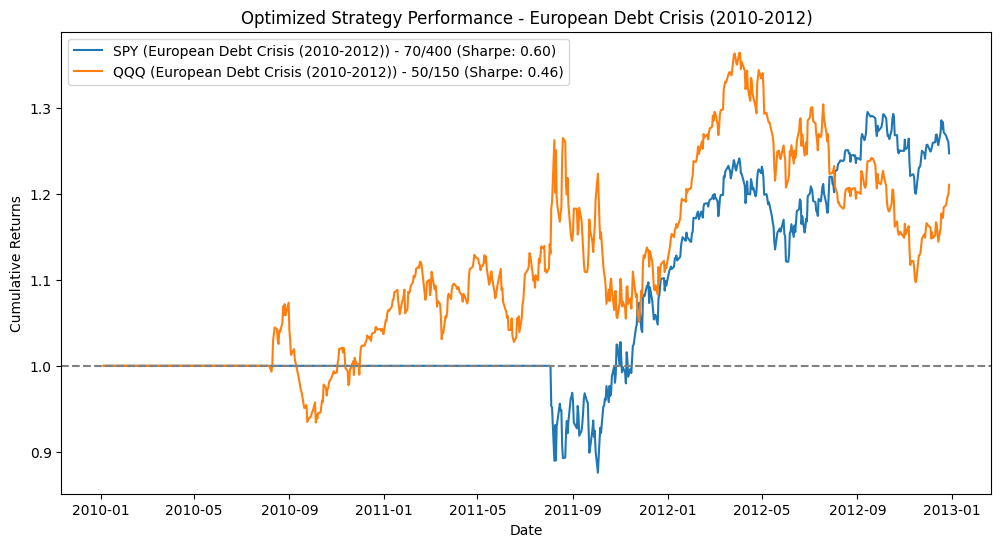

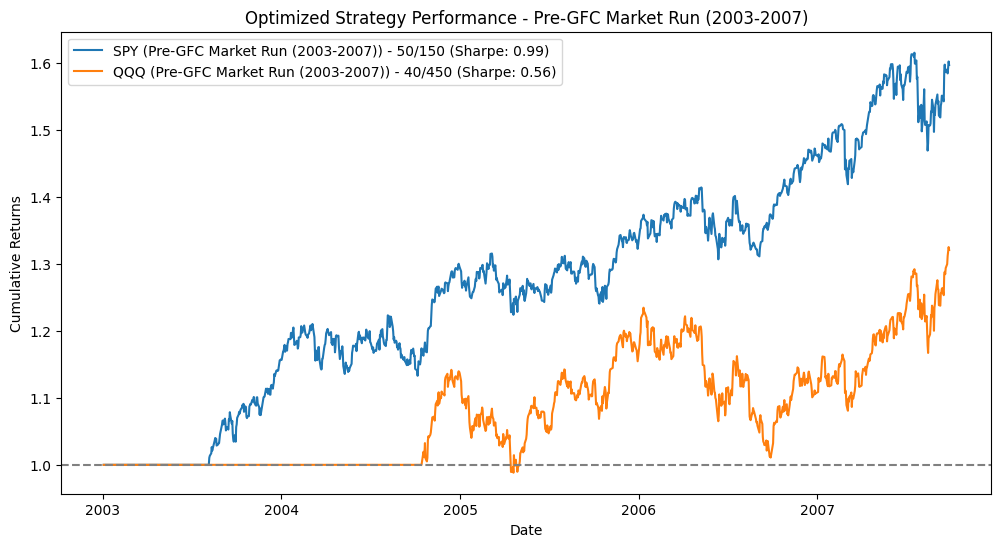

In [4]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from itertools import product

# 1️⃣ Definition of historical periods to test
trend_periods = {
    # 🔻 BEAR MARKETS
    "2008 Financial Crisis - Recovery": ("2007-10-01", "2013-12-31"),  # Subprime mortgage crisis & recovery
    "Dot-Com Bubble Burst": ("2000-01-01", "2002-12-31"),  # Dot-com crash & market downturn
    "COVID-19 Crash & Recovery": ("2020-02-01", "2021-12-31"),  # Pandemic-induced crash and recovery
    "2001 Recession & Post-9/11 Market Shock": ("2000-09-01", "2003-12-31"),  # Recession & geopolitical uncertainty
    
    # 📈 BULL & RANDOM HISTORICAL PERIODS FOR VALIDATION
    "Tech Boom & Dot-Com Crash": ("1995-01-01", "2003-12-31"),  # Rapid tech growth followed by collapse
    "Quantitative Easing & Bull Market": ("2013-01-01", "2019-12-31"),  # Fed stimulus-driven bull market
    "Trump Rally & Trade War": ("2016-01-01", "2019-12-31"),  # Tax cuts and US-China trade conflict
    "Post-Cold War & 90s Bull Market": ("1990-01-01", "1999-12-31"),  # Longest economic expansion before 2000
    
    # 🎲 THREE RANDOM PERIODS FOR ADDITIONAL VALIDATION
    "Global Financial Stability (2005-2006)": ("2005-01-01", "2006-12-31"),  # Relatively calm period before 2008 crisis
    "European Debt Crisis (2010-2012)": ("2010-01-01", "2012-12-31"),  # Eurozone instability, PIIGS crisis
    "Pre-GFC Market Run (2003-2007)": ("2003-01-01", "2007-09-30"),  # Market optimism leading to financial collapse
}


# 2️⃣ Strategy parameters
tickers = ["SPY", "QQQ"]
short_ma_values = [10,20,30,40,50,60,70,80,90,100]  # Different windows for the short moving average
long_ma_values = [100,150,200,250,300,350,400,450,500]  # Different windows for the long moving average

# 3️⃣ Dictionary to store results
results = {ticker: {} for ticker in tickers}

# 4️⃣ Function for backtesting the strategy
def moving_average_strategy(data, short_ma, long_ma):
    """Applies the moving average crossover strategy and calculates Total Return and Sharpe Ratio."""
    data["Short_MA"] = data["Close"].rolling(window=short_ma).mean()
    data["Long_MA"] = data["Close"].rolling(window=long_ma).mean()
    
    long_signal = data["Short_MA"] > data["Long_MA"]
    short_signal = data["Short_MA"] < data["Long_MA"]
    
    positions = np.zeros(len(data))
    positions[long_signal] = 1
    positions[short_signal] = -1
    positions = pd.Series(positions, index=data.index).ffill().fillna(0)
    
    returns = data["Close"].pct_change()
    strategy_returns = positions.shift(1) * returns
    strategy_returns = strategy_returns.dropna()
    
    cumulative_returns = (1 + strategy_returns).cumprod()
    total_return = cumulative_returns.iloc[-1] - 1
    
    # 🔹 Sharpe Ratio Calculation
    sharpe_std = np.std(strategy_returns, ddof=1)
    sharpe_ratio = (np.mean(strategy_returns) / sharpe_std * np.sqrt(252)) if sharpe_std > 0 else 0

    return total_return, sharpe_ratio, cumulative_returns

# 5️⃣ Backtest over all periods and moving average combinations
for period, (start_date, end_date) in trend_periods.items():
    print(f"\n🔹 Testing period: {period}")

    # Download market data
    data = yf.download(tickers, start=start_date, end=end_date)["Close"]

    for ticker in tickers:
        if ticker not in data.columns:
            print(f"❌ No data available for {ticker} in period {period}")
            continue
        
        best_return = -np.inf
        best_sharpe = -np.inf
        best_params = None
        best_cumulative_returns = None
        
        for short_ma, long_ma in product(short_ma_values, long_ma_values):
            if short_ma >= long_ma:  # Avoid invalid combinations
                continue
            
            # ✅ SOLUTION: Rename the stock column to "Close" to avoid errors
            ticker_data = data[[ticker]].copy()
            ticker_data.columns = ["Close"]

            total_return, sharpe_ratio, cumulative_returns = moving_average_strategy(ticker_data, short_ma, long_ma)
            
            # 🔹 If the return is better or, at equal return, the Sharpe Ratio is higher
            if total_return > best_return or (total_return == best_return and sharpe_ratio > best_sharpe):
                best_return = total_return
                best_sharpe = sharpe_ratio
                best_params = (short_ma, long_ma)
                best_cumulative_returns = cumulative_returns
        
        results[ticker][period] = {
            "best_short_ma": best_params[0],
            "best_long_ma": best_params[1],
            "total_return": best_return,
            "sharpe_ratio": best_sharpe,
            "cumulative_returns": best_cumulative_returns
        }

        print(f"  📈 {ticker} - Best MAs: {best_params}, Total Return: {best_return:.2%}, Sharpe Ratio: {best_sharpe:.2f}")

# 6️⃣ Plot the best strategies
for period in trend_periods.keys():
    plt.figure(figsize=(12, 6))
    
    for ticker in tickers:
        if period in results[ticker]:
            plt.plot(results[ticker][period]["cumulative_returns"], 
                     label=f"{ticker} ({period}) - {results[ticker][period]['best_short_ma']}/{results[ticker][period]['best_long_ma']} (Sharpe: {results[ticker][period]['sharpe_ratio']:.2f})")
    
    plt.axhline(1, color='gray', linestyle='--')
    plt.title(f"Optimized Strategy Performance - {period}")
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.show()
    